In [67]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive',  force_remount=True)

In [68]:
# !ls /content/drive/My\ Drive/Data_WGAN

In [69]:
# !apt-get install pvimport torch
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [70]:
# !pv drive/My\ Drive/Data_WGAN/mnist.zip > /content/mnist.zip

In [71]:
# !unzip -q /content/mnist.zip

In [72]:
import torch
import torch.nn
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from tensorflow.examples.tutorials.mnist import input_data
import os
# os.chdir('/content/')

In [73]:
%matplotlib inline

In [74]:
mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
# mb_size = 32
# z_dim = 10
# X_dim = mnist.train.images.shape[1]
# y_dim = mnist.train.labels.shape[1]
# h_dim = 128
# cnt = 0
# lr = 1e-4
# mnist = dset.ImageFolder('/content',
#                            transform=transforms.Compose([
#                                transforms.Resize(mb_size),
#                                transforms.CenterCrop(mb_size),
#                                transforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                            ]))


Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


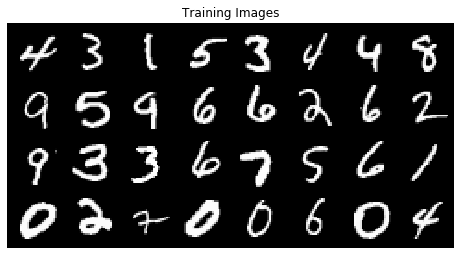

In [75]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)


# Create the dataloader
# dataloader = torch.utils.data.DataLoader(mnist.train.images, batch_size=32,
#                                          shuffle=True, num_workers=2)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [76]:
mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
mb_size = 32
z_dim = 10
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
h_dim = 128
cnt = 0
lr = 1e-4

# Create the Generator
G = torch.nn.Sequential(
    torch.nn.Linear(z_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, X_dim),
    torch.nn.Sigmoid()
)

# Create the discriminator
D = torch.nn.Sequential(
    torch.nn.Linear(X_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, 1),
)


def reset_grad():
    G.zero_grad()
    D.zero_grad()


G_solver = optim.RMSprop(G.parameters(), lr=lr)
D_solver = optim.RMSprop(D.parameters(), lr=lr)


Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


In [106]:
from utils import logger
from utils import tensorboard_writer
import datetime
from tensorflow import summary
import tensorflow as tf
%load_ext tensorboard
import datetime
import torchvision.utils as vutils
import numpy as np

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [139]:
logger_obj = logger.init('utils/runs/')
writer = tensorboard_writer.TensorboardWriter('utils/runs/')
current_time = str(datetime.datetime.now().timestamp())
train_log_dir = 'utils/runs/' + current_time
train_summary_writer = summary.FileWriter(train_log_dir)

In [140]:
%tensorboard --logdir utils/runs/

Iter-0; D_loss: -0.005562879145145416; G_loss: -0.016499442979693413
2019-11-28 12:57:22,834 |     MainProcess | MainThread | Summary name Real Images is illegal; using Real_Images instead.
2019-11-28 12:57:22,842 |     MainProcess | MainThread | Summary name Fake Images is illegal; using Fake_Images instead.


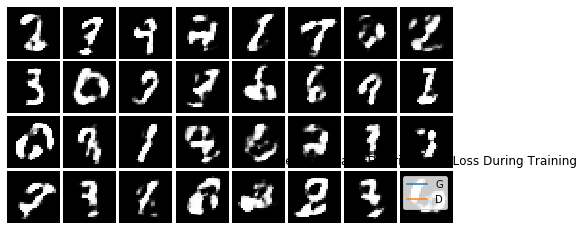

Iter-1000; D_loss: -0.013592101633548737; G_loss: -0.005541923455893993
2019-11-28 12:57:39,205 |     MainProcess | MainThread | Summary name Real Images is illegal; using Real_Images instead.
2019-11-28 12:57:39,214 |     MainProcess | MainThread | Summary name Fake Images is illegal; using Fake_Images instead.


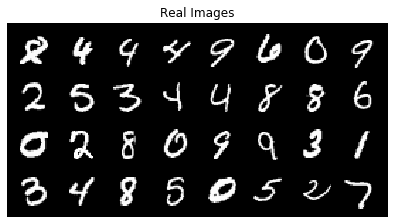

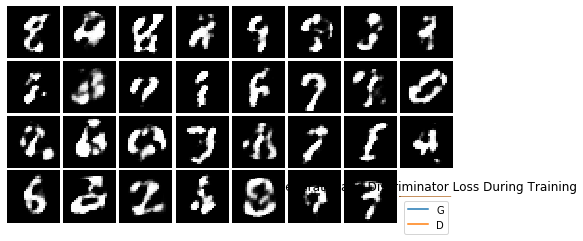

Iter-2000; D_loss: -0.009778395295143127; G_loss: -0.004635604098439217
2019-11-28 12:57:57,718 |     MainProcess | MainThread | Summary name Real Images is illegal; using Real_Images instead.
2019-11-28 12:57:57,727 |     MainProcess | MainThread | Summary name Fake Images is illegal; using Fake_Images instead.


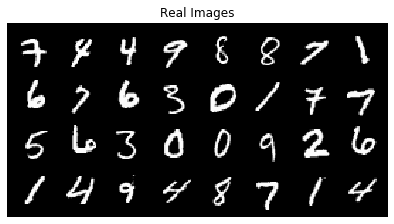

KeyboardInterrupt: 

In [141]:
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
for it in range(100000):
    i = 1
    for _ in range(5):
        # Sample data
        z = Variable(torch.randn(mb_size, z_dim))
        X, _ = mnist.train.next_batch(mb_size)
        X = Variable(torch.from_numpy(X))

        # Dicriminator forward-loss-backward-update
        G_sample = G(z)
        D_real = D(X)
        D_fake = D(G_sample)

        D_loss = -(torch.mean(D_real) - torch.mean(D_fake))
        if i == 5:
          D_losses.append(D_loss.item())

        D_loss.backward()
        D_solver.step()

        # Weight clipping
        for p in D.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Housekeeping - reset gradient
        reset_grad()
        i=i+1

    # Generator forward-loss-backward-update
    X, _ = mnist.train.next_batch(mb_size)
    X = Variable(torch.from_numpy(X))
    z = Variable(torch.randn(mb_size, z_dim))

    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = -torch.mean(D_fake)
    G_losses.append(G_loss.item())

    G_loss.backward()
    G_solver.step()

    # Housekeeping - reset gradient
    reset_grad()

    # Print and plot every now and then
    if it % 1000 == 0:
        print('Iter-{}; D_loss: {}; G_loss: {}'
              .format(it, D_loss.data.numpy(), G_loss.data.numpy()))

        samples = G(z).data.numpy()[:64]

        fig = plt.figure(figsize=(8, 8))
        gs = gridspec.GridSpec(8, 8)
        gs.update(wspace=0.05, hspace=0.05)

        for i, sample in enumerate(samples):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
            # pass the created images to the tensor
#             writer.save_image("Fake Images",sample.reshape(28, 28))
#             with torch.no_grad():
#                 fake = G(z).data.detach().cpu()[:64]
#             img_list.append(vutils.make_grid(sample, padding=2, normalize=True))
    
#             img_list.append(vutils.make_grid(images_batch, padding=2, normalize=True))
        
        with torch.no_grad():
            fake = G(z).data.detach().cpu()
        
        # pass real images to the tesor
        writer.save_image("Real Images",
                    vutils.make_grid(real_batch[0][:64], padding=5, normalize=True))
        # pass the created images to the tensor
        writer.save_image("Fake Images",
                    vutils.make_grid(fake[:64], padding=5, normalize=True
        if not os.path.exists('out/'):
            os.makedirs('out/')

#         plt.title("Fake Images")
#         plt.show()
#         plt.savefig('out/{}.png'.format(str(cnt).zfill(3)), bbox_inches='tight')
#         cnt += 1
#         plt.close(fig)
#         plt.figure(figsize=(10,5))
        plt.title("Generator and Discriminator Loss During Training")
        plt.plot(G_losses,label="G")
        plt.plot(D_losses,label="D")
        plt.xlabel("iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        real_batch = next(iter(train_loader))

        # Plot the real images
        plt.figure(figsize=(15,15))
        plt.subplot(1,2,1)
        plt.axis("off")
        plt.title("Real Images")
        plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))
